<a href="https://colab.research.google.com/github/promaxsysaditya/msme-demo/blob/main/demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratyushakar/rossmann-store-sales")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'rossmann-store-sales' dataset.
Path to dataset files: /kaggle/input/rossmann-store-sales


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv(f"{path}/train.csv")
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['WeekOfYear'] = data['Date'].dt.isocalendar().week.astype(int)

display(data.head())

/tmp/ipython-input-1505460144.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"{path}/train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,4,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,4,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,4,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,4,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'Customers', 'Year', 'Month', 'Day', 'WeekOfYear']
X = data[features]
y = data['Sales']

X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} records")
print(f"Testing set size: {len(X_test)} records")

Training set size: 813767 records
Testing set size: 203442 records


---

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 988.51
Mean Squared Error (MSE): 2159924.91
Root Mean Squared Error (RMSE): 1469.67
R-squared (R2): 0.85


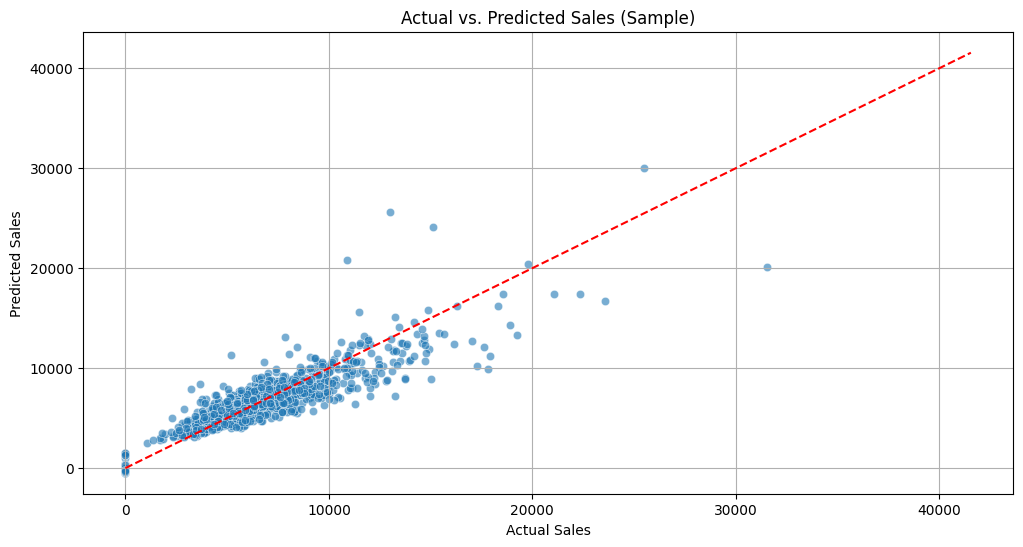

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df.sample(n=1000, random_state=42), alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Line of perfect prediction
plt.title('Actual vs. Predicted Sales (Sample)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

---

In [ ]:
print("Enter values for the sales prediction:")

input_store = int(input("Store (e.g., 1): "))
input_dayofweek = int(input("DayOfWeek (0=Monday, 6=Sunday): "))
input_open = int(input("Open (1=Yes, 0=No): "))
input_promo = int(input("Promo (1=Yes, 0=No): "))
input_customers = int(input("Customers: "))
input_year = int(input("Year (e.g., 2015): "))
input_month = int(input("Month (1-12): "))
input_day = int(input("Day (1-31): "))


from datetime import datetime

try:
    input_date = datetime(input_year, input_month, input_day)
    input_weekofyear = input_date.isocalendar().week
except ValueError as e:
    print(f"Error creating date from input: {e}. Please ensure valid year, month, day.")
    input_weekofyear = 0

user_input_df = pd.DataFrame([{
    'Store': input_store,
    'DayOfWeek': input_dayofweek,
    'Open': input_open,
    'Promo': input_promo,
    'Customers': input_customers,
    'Year': input_year,
    'Month': input_month,
    'Day': input_day,
    'WeekOfYear': input_weekofyear
}])

user_input_df = user_input_df.reindex(columns=features, fill_value=0)

predicted_sales = model.predict(user_input_df)

print(f"\nPredicted Sales for the given input: {predicted_sales[0]:.2f}")

Enter values for the sales prediction:
Store (e.g., 1): 1
DayOfWeek (0=Monday, 6=Sunday): 1
Open (1=Yes, 0=No): 1
Promo (1=Yes, 0=No): 1
Customers: 12
Year (e.g., 2015): 2015
Month (1-12): 1
Day (1-31): 1

Predicted Sales for the given input: 3275.40
